# Homework 3- Optimatisation 

Harshal Shinoy Thachapully 

## Question 1

In this exercise, you will compare the number of iterations for IBS and GSS to reach a certain tolerance condition. Does GSS reach the tolerance condition with fewer iterations, on average?

We will consider minimizing the convex function f(x)=x2
in this problem. Of course, the minimum occurs at x=0, but we focus here on the smallest number of iterations T until $ U_T - L_T < $ tol, where tol is a constant. The initial search interval [L0,U0] will be randomly produced as follows: L0∼U[−10,0] and U0∼U[0,10]. ( U stands for uniform distribution.) Let’s terminate each algorithm using the above tolerance condition, for the same value of tol.

Plot the log10 of the average value of T for IBS (blue lines and points) and GSS (red lines and points) as a function of $log_10 $ tol. Consider 50 trials of each algorithm to compute this average. To prevent long run times, set the maximum number of iterations to 1000. Let the value of tol vary in the interval [10−8,100]. Which algorithm performs best, and why?

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Define the range of tol values in log space
tol_values = np.logspace(-8, 0, num=100)

# Number of trials for each algorithm
num_trials = 50

# Maximum number of iterations allowed
max_iterations = 1000

# An array to store the average number of iterations
avg_iterations_IBS = []
avg_iterations_GSS = []

In [23]:
tol_values

array([1.00000000e-08, 1.20450354e-08, 1.45082878e-08, 1.74752840e-08,
       2.10490414e-08, 2.53536449e-08, 3.05385551e-08, 3.67837977e-08,
       4.43062146e-08, 5.33669923e-08, 6.42807312e-08, 7.74263683e-08,
       9.32603347e-08, 1.12332403e-07, 1.35304777e-07, 1.62975083e-07,
       1.96304065e-07, 2.36448941e-07, 2.84803587e-07, 3.43046929e-07,
       4.13201240e-07, 4.97702356e-07, 5.99484250e-07, 7.22080902e-07,
       8.69749003e-07, 1.04761575e-06, 1.26185688e-06, 1.51991108e-06,
       1.83073828e-06, 2.20513074e-06, 2.65608778e-06, 3.19926714e-06,
       3.85352859e-06, 4.64158883e-06, 5.59081018e-06, 6.73415066e-06,
       8.11130831e-06, 9.77009957e-06, 1.17681195e-05, 1.41747416e-05,
       1.70735265e-05, 2.05651231e-05, 2.47707636e-05, 2.98364724e-05,
       3.59381366e-05, 4.32876128e-05, 5.21400829e-05, 6.28029144e-05,
       7.56463328e-05, 9.11162756e-05, 1.09749877e-04, 1.32194115e-04,
       1.59228279e-04, 1.91791026e-04, 2.31012970e-04, 2.78255940e-04,
      

In [24]:
# Function to minimize (f(x) = x^2)
def f(x):
    return x**2

In [25]:
# Implement the Interval Bisection Search (IBS) algorithm
def ibs_search(a, b, tol):
    iterations = 0
    while (b - a) > tol and iterations < max_iterations:
        c = (a + b) / 2
        if f(c) < f(a):
            b = c
        else:
            a = c
        iterations += 1
    return iterations


In [26]:
# Implement the Golden Section Search (GSS) algorithm
def gss_search(a, b, tol):
    iterations = 0
    phi = (1 + np.sqrt(5)) / 2  # Golden ratio
    x1 = b - (b - a) / phi
    x2 = a + (b - a) / phi
    while (b - a) > tol and iterations < max_iterations:
        if f(x1) < f(x2):
            b = x2
        else:
            a = x1
        x1 = b - (b - a) / phi
        x2 = a + (b - a) / phi
        iterations += 1
    return iterations

In [27]:
# Run trials for each tol value and collect results
for tol in tol_values:
    ibs_iterations = 0
    gss_iterations = 0
    for _ in range(num_trials):
        # Randomly generate initial intervals L0 and U0
        L0 = np.random.uniform(-10, 0)
        U0 = np.random.uniform(0, 10)
        
        # Run IBS and GSS with the current tol
        ibs_iterations += ibs_search(L0, U0, tol)
        gss_iterations += gss_search(L0, U0, tol)
    
    # Compute average iterations and take the logarithm
    avg_iterations_IBS.append(np.log10(ibs_iterations / num_trials))
    avg_iterations_GSS.append(np.log10(gss_iterations / num_trials))

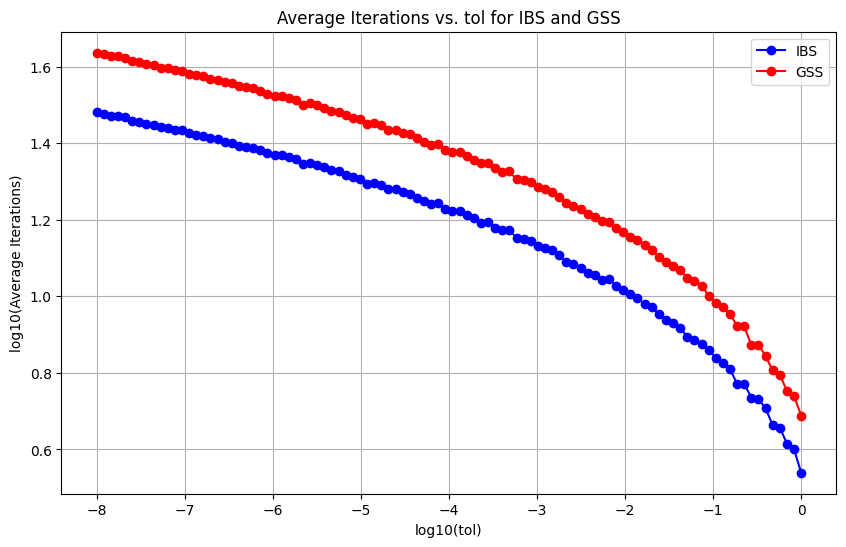

In [28]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(np.log10(tol_values), avg_iterations_IBS, 'bo-', label='IBS')
plt.plot(np.log10(tol_values), avg_iterations_GSS, 'ro-', label='GSS')
plt.xlabel('log10(tol)')
plt.ylabel('log10(Average Iterations)')
plt.legend()
plt.grid(True)
plt.title('Average Iterations vs. tol for IBS and GSS')
plt.show()


##### Justification:

d

### Additional credit Question 1 

Additional credit: Can you improve the GSS algorithm in this case? Consider modifying the GSS to reduce the average number of iterations. Change the golden ratio by +10% and -10%, and compare the average number of iterations to that of GSS as above. Plot the results for GSS in red, +10% in blue, and -10% in magenta. Which of these three methods performs best in this case, and why?

In [29]:
# Define the original golden ratio
original_phi = (1 + np.sqrt(5)) / 2

# Define the modified golden ratios (+10% and -10%)
golden_ratio_plus_10_percent = original_phi * 1.1
golden_ratio_minus_10_percent = original_phi * 0.9

# Initialize arrays to store results
avg_iterations_GSS_original = []
avg_iterations_GSS_plus_10_percent = []
avg_iterations_GSS_minus_10_percent = []

In [30]:
# Implement the modified version of the Golden Section Search (GSS) algorithm with a given phi value
def gss_search(a, b, tol, phi):
    iterations = 0
    x1 = b - (b - a) / phi
    x2 = a + (b - a) / phi
    while (b - a) > tol and iterations < max_iterations:
        if f(x1) < f(x2):
            b = x2
        else:
            a = x1
        x1 = b - (b - a) / phi
        x2 = a + (b - a) / phi
        iterations += 1
    return iterations

In [31]:
# Run trials for each tol value and collect results
for tol in tol_values:
    original_iterations = 0
    plus_10_percent_iterations = 0
    minus_10_percent_iterations = 0
    for _ in range(num_trials):
        # Randomly generate initial intervals L0 and U0
        L0 = np.random.uniform(-10, 0)
        U0 = np.random.uniform(0, 10)
        
        # Run GSS with different phi values
        original_iterations += gss_search(L0, U0, tol, original_phi)
        plus_10_percent_iterations += gss_search(L0, U0, tol, golden_ratio_plus_10_percent)
        minus_10_percent_iterations += gss_search(L0, U0, tol, golden_ratio_minus_10_percent)
    
    # Compute average iterations and take the logarithm
    avg_iterations_GSS_original.append(np.log10(original_iterations / num_trials))
    avg_iterations_GSS_plus_10_percent.append(np.log10(plus_10_percent_iterations / num_trials))
    avg_iterations_GSS_minus_10_percent.append(np.log10(minus_10_percent_iterations / num_trials))

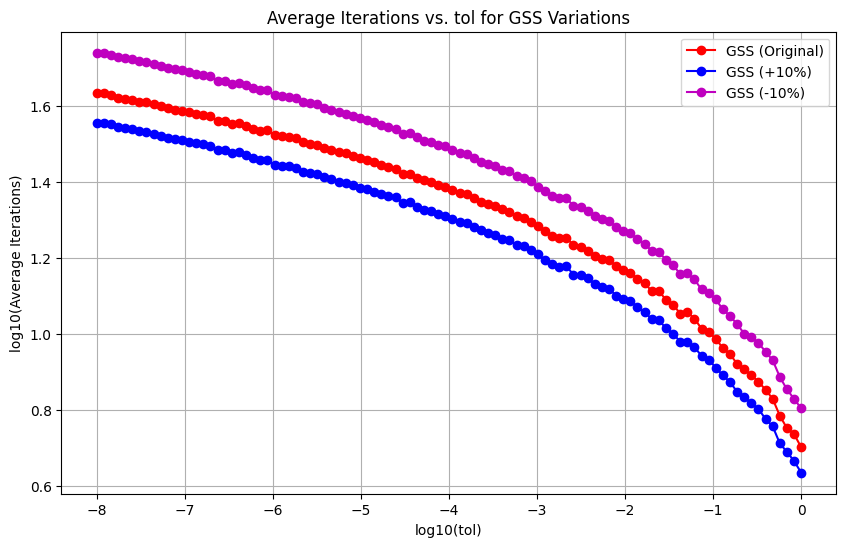

In [32]:
# Plot the results for GSS, +10%, and -10% golden ratios
plt.figure(figsize=(10, 6))
plt.plot(np.log10(tol_values), avg_iterations_GSS_original, 'ro-', label='GSS (Original)')
plt.plot(np.log10(tol_values), avg_iterations_GSS_plus_10_percent, 'bo-', label='GSS (+10%)')
plt.plot(np.log10(tol_values), avg_iterations_GSS_minus_10_percent, 'mo-', label='GSS (-10%)')
plt.xlabel('log10(tol)')
plt.ylabel('log10(Average Iterations)')
plt.legend()
plt.grid(True)
plt.title('Average Iterations vs. tol for GSS Variations')
plt.show()


##### Justification:

d

## Question 2